In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv


In [2]:
df = pd.read_csv('/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')

In [3]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
# Checking basic stats
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [5]:
# checking for dtype, non-nullcount 
df.info()
# to check the missing value % in each field use the code below
# df.isna().mean() * 100 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


We do not see any Nan Values in any of the fields

# EDA 

In [6]:
# importing basic libraries
import matplotlib.pyplot as plt
import seaborn as sns 

In [7]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

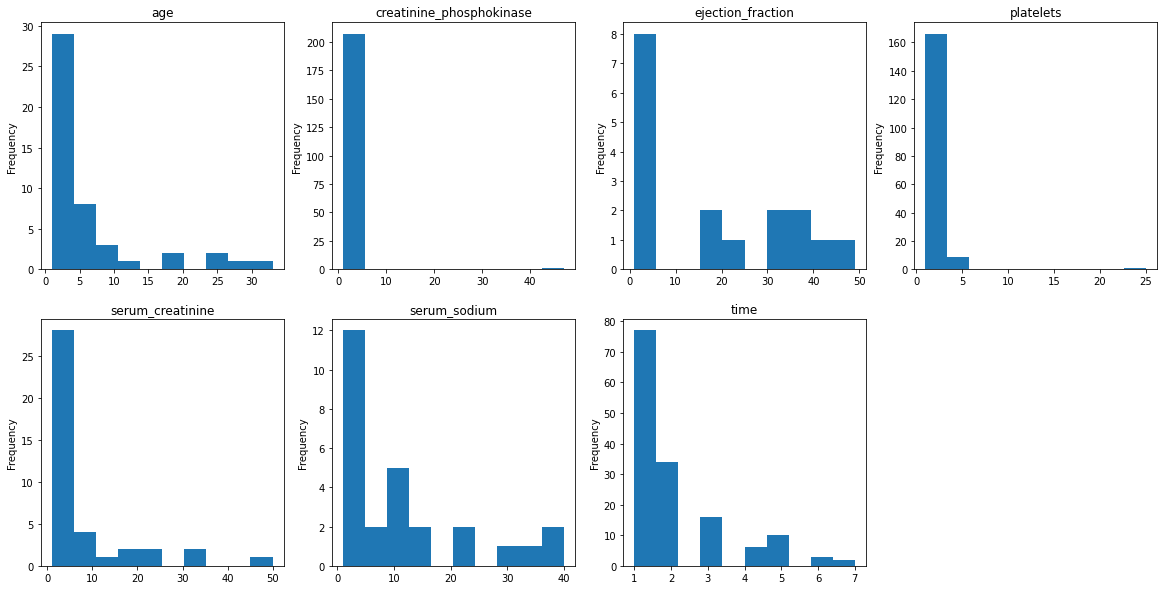

In [8]:
num_col = ['age', 'creatinine_phosphokinase',
       'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium', 'time']
j =1 
fig = plt.figure(figsize =(20,10))
for i in num_col: 
    plt.subplot(2,4,j)
    df[i].value_counts().plot(kind ='hist')
    plt.title(i)
    j=j+1

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

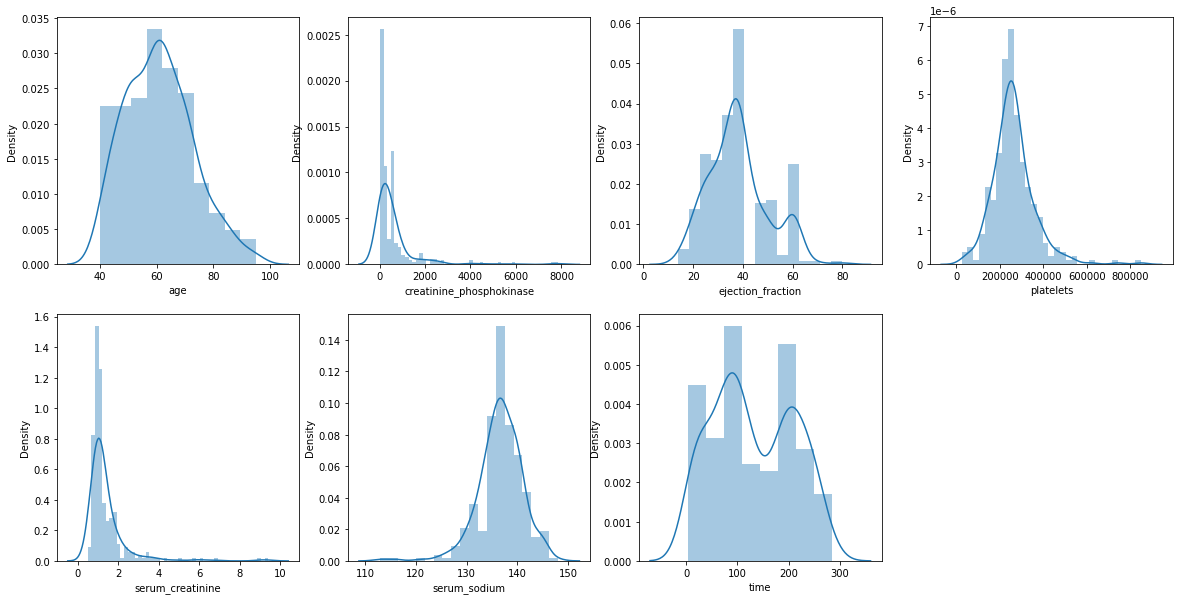

In [9]:
fig = plt.figure(figsize=(20,10))
j=1
for i in num_col:
    plt.subplot(2,4,j)
    sns.distplot(df[i])
    j=j+1

All the numerical fields are skewed

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

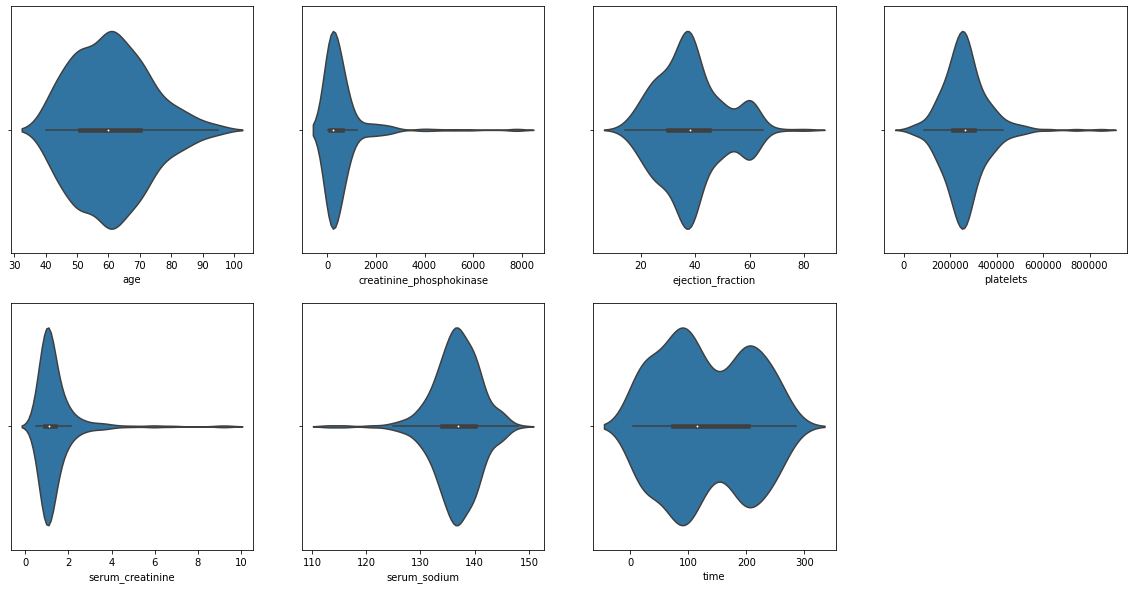

In [10]:
fig = plt.figure(figsize=(20,10))
j=1
for i in num_col:
    plt.subplot(2,4,j)
    sns.violinplot(df[i])
    j=j+1

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

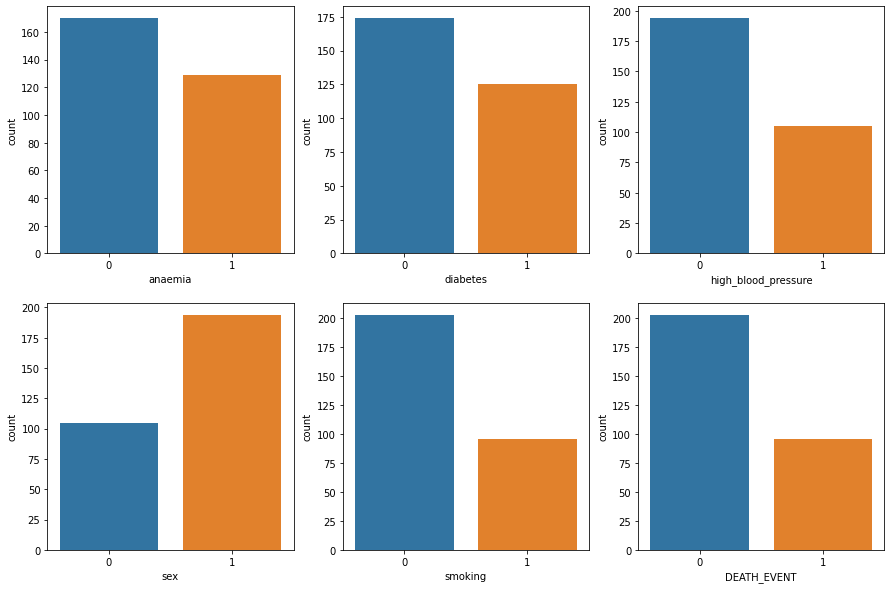

In [11]:
cat_col = [ 'anaemia', 'diabetes','high_blood_pressure', 'sex', 'smoking','DEATH_EVENT']
fig = plt.figure(figsize = (15,10))
j=1
for i in cat_col:
    plt.subplot(2,3,j)
    sns.countplot(df[i])
    j=j+1
    

We are assuming 
* Sex - Gender of patient Male = 1, Female =0
* Diabetes - 0 = No, 1 = Yes
* Anaemia - 0 = No, 1 = Yes
* High_blood_pressure - 0 = No, 1 = Yes
* Smoking - 0 = No, 1 = Yes
* DEATH_EVENT - 0 = No, 1 = Yes

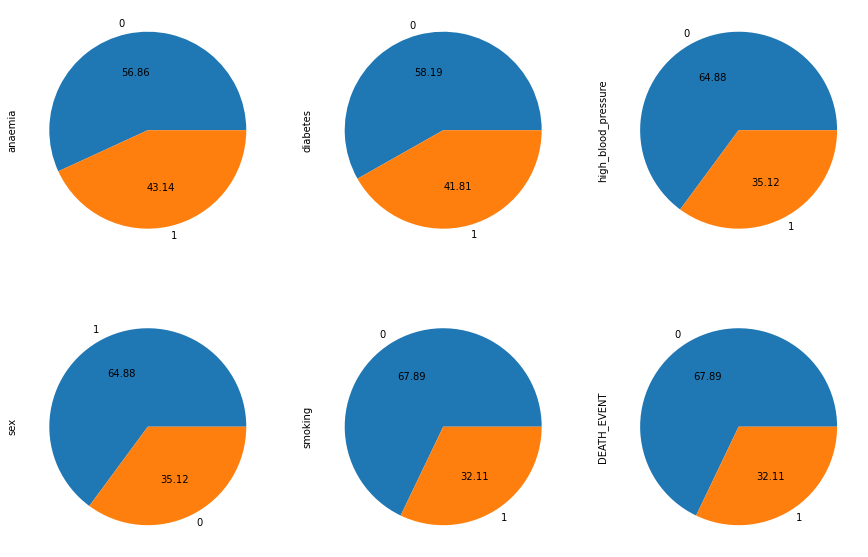

In [12]:
cat_col = [ 'anaemia', 'diabetes','high_blood_pressure', 'sex', 'smoking','DEATH_EVENT']
fig = plt.figure(figsize = (15,10))
j=1
for i in cat_col:
    plt.subplot(2,3,j)
    df[i].value_counts().plot(kind ='pie',autopct = '%.2f')
    j=j+1
    

1. Sex - Male- 64.88 , Female- 35.12
1. Diabetes - No = 58.19, Yes = 41.81
1. Anaemia - No = 56.86 , Yes = 43.14 
1. High_blood_pressure - No = 64.88, Yes = 35.12
1. Smoking - No = 67.89, Yes = 32.11
1. DEATH_EVENT - No = 67.89, Yes = 32.11

In [13]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='age'>

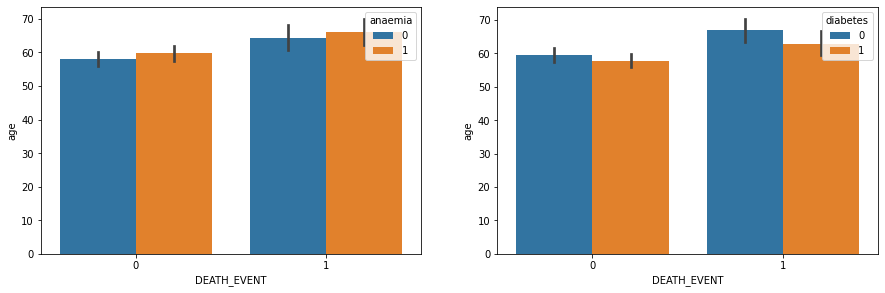

In [14]:
fig = plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(df['DEATH_EVENT'], df['age'],hue=df['anaemia'])
plt.subplot(2,2,2)
sns.barplot(df['DEATH_EVENT'], df['age'],hue=df['diabetes'])

Old people who are having diabetes and anaemia have higher chance of dying 

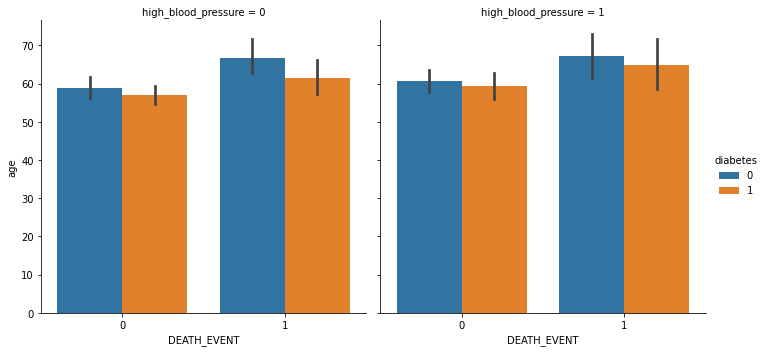

In [15]:
sns.catplot(x = 'DEATH_EVENT', y= 'age', data =df, kind='bar' , hue ='diabetes',col ='high_blood_pressure')

Much Older peeps who are having high blood pressure and diabetes will die as compared to slightly younger peeps 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='creatinine_phosphokinase'>

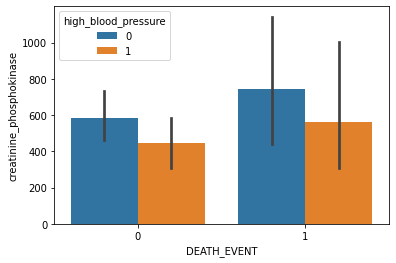

In [16]:
sns.barplot(df['DEATH_EVENT'], df['creatinine_phosphokinase'],hue=df['high_blood_pressure'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='anaemia', ylabel='creatinine_phosphokinase'>

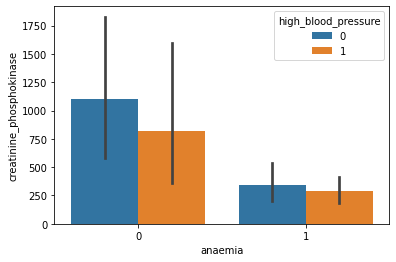

In [17]:
data = df[df['DEATH_EVENT'] == 1]
sns.barplot(data['anaemia'], data['creatinine_phosphokinase'] , hue =data['high_blood_pressure'])

Clearly evident that people who are suffering from high_blood_pressure and anaemia have low creatinine_phosphokinase - Level of the CPK enzyme in the blood (mcg/L) and these people have a heart failure. So its important to have higher creatinine_phosphokinase

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='sex', ylabel='creatinine_phosphokinase'>

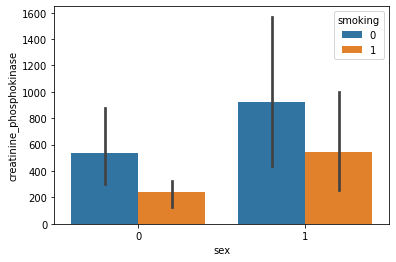

In [18]:
data = df[df['DEATH_EVENT'] == 1]
sns.barplot(data['sex'], data['creatinine_phosphokinase'] , hue =data['smoking'])

The number of deaths for a male smoker > female smoker also creatinine_phosphokinase is more in Male 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-package

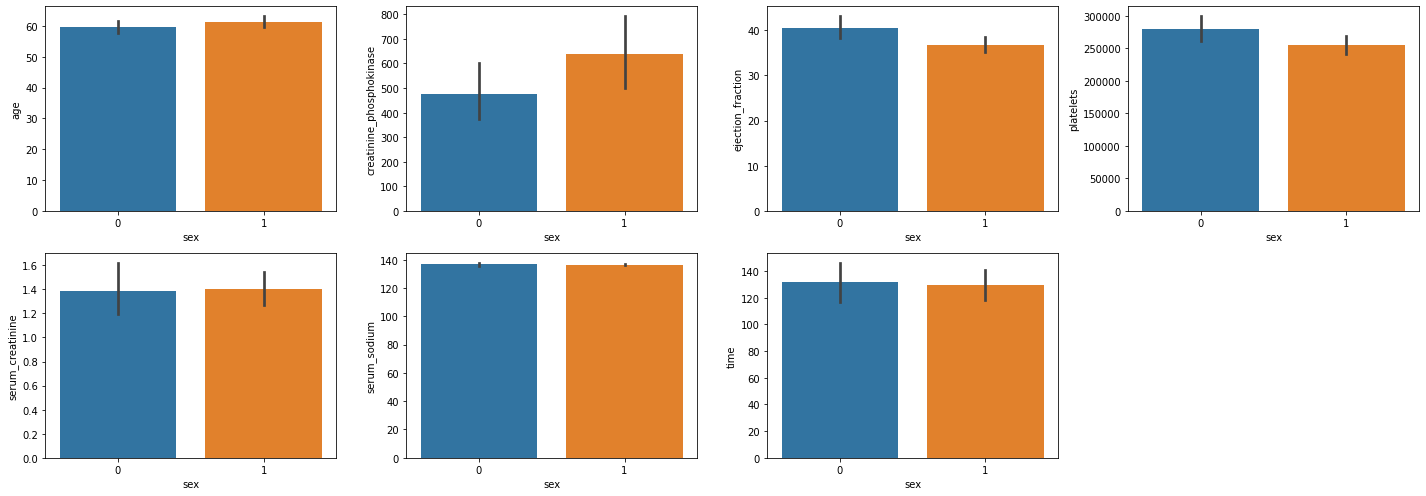

In [19]:
fig = plt.figure(figsize = (20,10))
j =1 
for i in num_col: 
    plt.subplot(3,4,j)
    sns.barplot(df['sex'], df[i])
    j = j+1
    
plt.tight_layout()

* Male have less ejection_fraction than women
* Platelets count is also slightly high in women

In [20]:
cat_col

['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']

<AxesSubplot:xlabel='sex', ylabel='anaemia'>

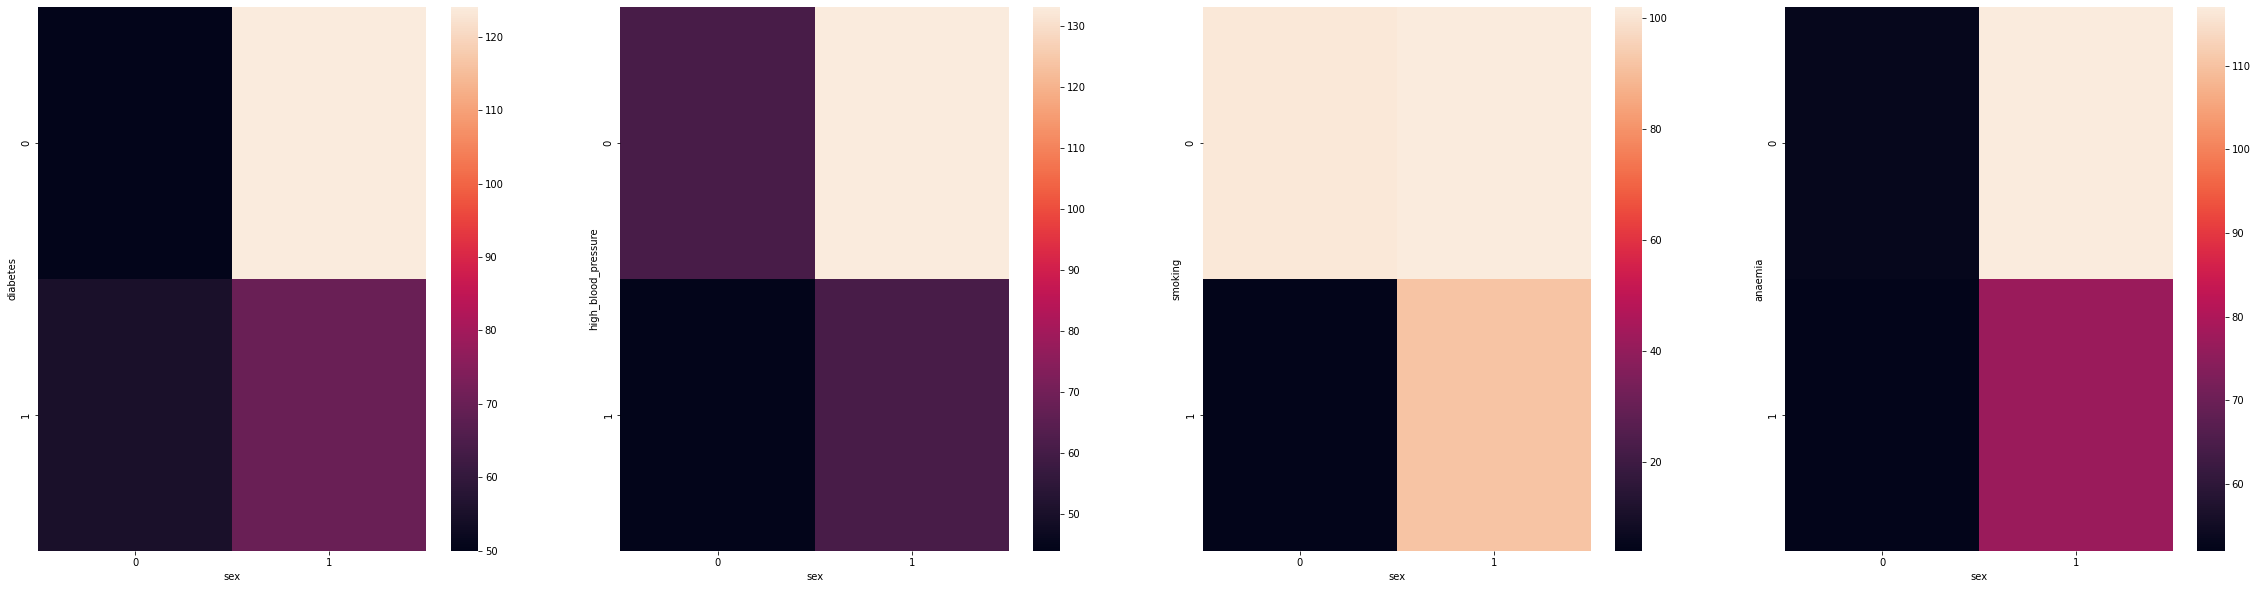

In [21]:
fig = plt.figure(figsize =(40,10))
plt.subplot(1,4,1)
map = pd.crosstab(df['diabetes'],df['sex'])
sns.heatmap(map)


plt.subplot(1,4,2)
map = pd.crosstab(df['high_blood_pressure'],df['sex'])
sns.heatmap(map)


plt.subplot(1,4,3)
map = pd.crosstab(df['smoking'],df['sex'])
sns.heatmap(map)


plt.subplot(1,4,4)
map = pd.crosstab(df['anaemia'],df['sex'])
sns.heatmap(map)

* Men are more diabetic than women
* Men are having more blood pressure than women 

In [22]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

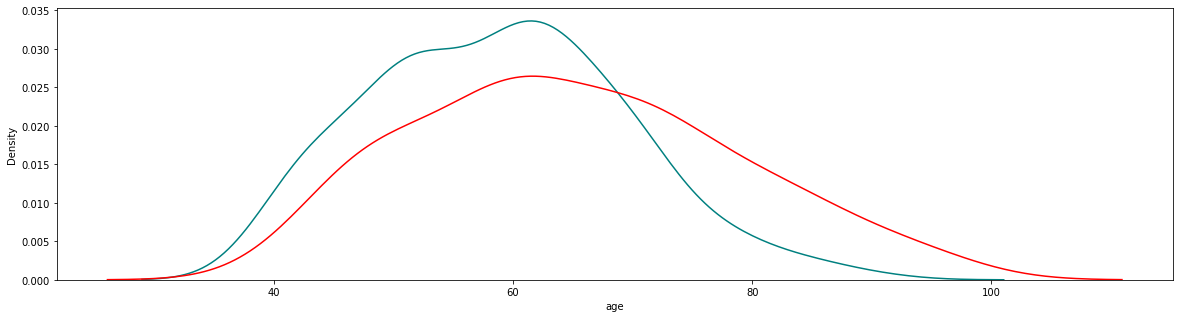

In [23]:
fig = plt.figure(figsize =(20,5))
sns.distplot(df[df['DEATH_EVENT'] == 0]['age'],hist = False,color = 'teal')
sns.distplot(df[df['DEATH_EVENT'] == 1]['age'],hist =False, color='red')

If a person is above 70 then his chances of getting a heart failure is high

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

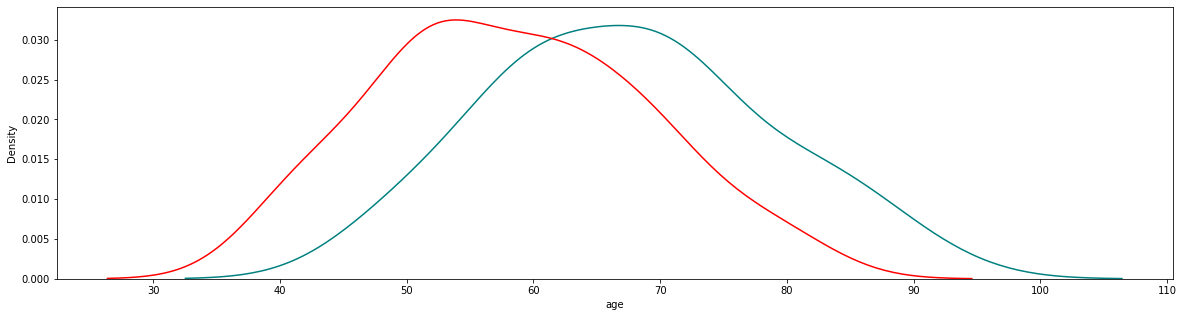

In [24]:
data1 =df[df['DEATH_EVENT'] == 1]
data2 =df[df['DEATH_EVENT'] == 0]

fig = plt.figure(figsize =(20,5))
sns.distplot(data1[data1['smoking'] == 1]['age'],hist = False,color = 'teal')
sns.distplot(data2[data2['smoking'] == 1]['age'],hist =False, color='red')

A Smoker has a higher chance of heartfailure having same age as that of a Non Smoker

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

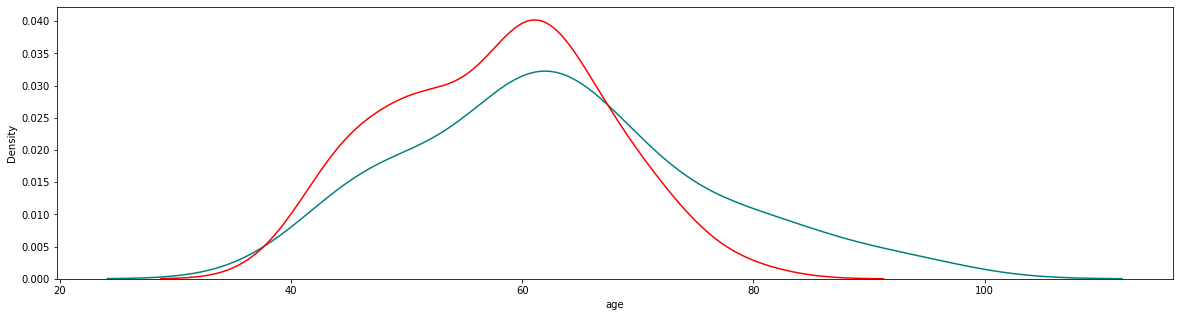

In [25]:
data1 =df[df['DEATH_EVENT'] == 1]
data2 =df[df['DEATH_EVENT'] == 0]

fig = plt.figure(figsize =(20,5))
sns.distplot(data1[data1['diabetes'] == 1]['age'],hist = False,color = 'teal')
sns.distplot(data2[data2['diabetes'] == 1]['age'],hist =False, color='red')

Similar result for diabetes, at a lower age chances of getting a heart failure is high for a diabetic person

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

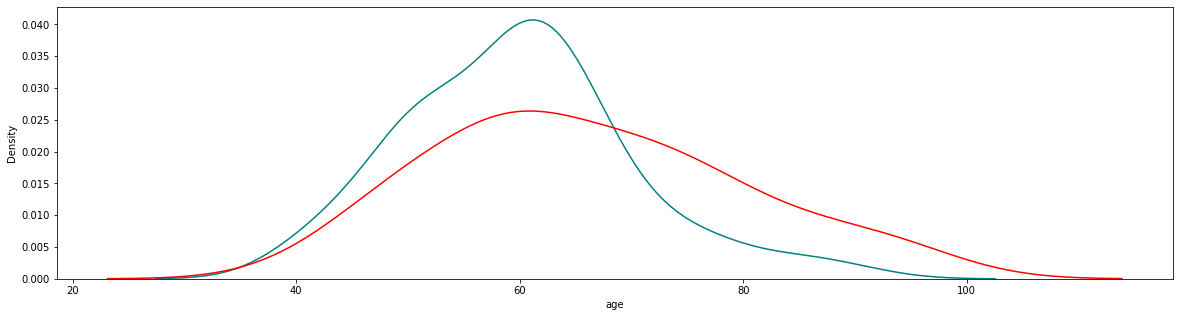

In [26]:
data1 =df[df['DEATH_EVENT'] == 1]
data2 =df[df['DEATH_EVENT'] == 0]


fig = plt.figure(figsize =(20,5))
sns.distplot(data2[data2['anaemia'] == 1]['age'],hist = False,color = 'teal')
sns.distplot(data1[data1['anaemia'] == 1]['age'],hist =False, color='red')

A person suffering from anemia has fatality when crossing age of 70 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

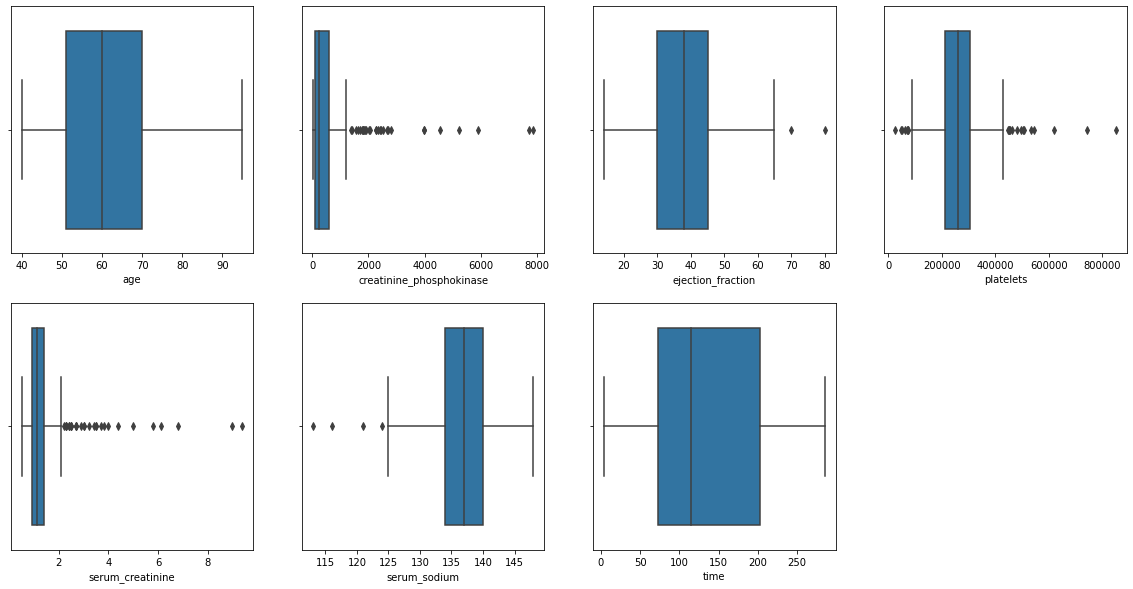

In [27]:
fig = plt.figure(figsize=(20,10))
j=1
for i in num_col:
    plt.subplot(2,4,j)
    sns.boxplot(df[i])
    j=j+1

# FEATURE ENGINNERING

In [28]:
q1 = df['platelets'].quantile(0.25)
q3 = df['platelets'].quantile(0.75)
iqr = q3 - q1
mini = q1 - 1.5* iqr
maxi = q3 + 1.5*iqr
df['platelets'].max(), maxi


(850000.0, 440000.0)

In [29]:
# Handling Outliers - iqr method then capping
outliers = ['creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium']

df1 = df.copy()
for i in outliers:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    
    iqr  = q3 - q1
    mini = q1 - 1.5* iqr
    maxi = q3 + 1.5*iqr
    

    df1[i] = np.where(
    df1[i] > maxi,
    maxi,
    np.where(
        df1[i] < mini,
        mini,
        df1[i]
        )
    )

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

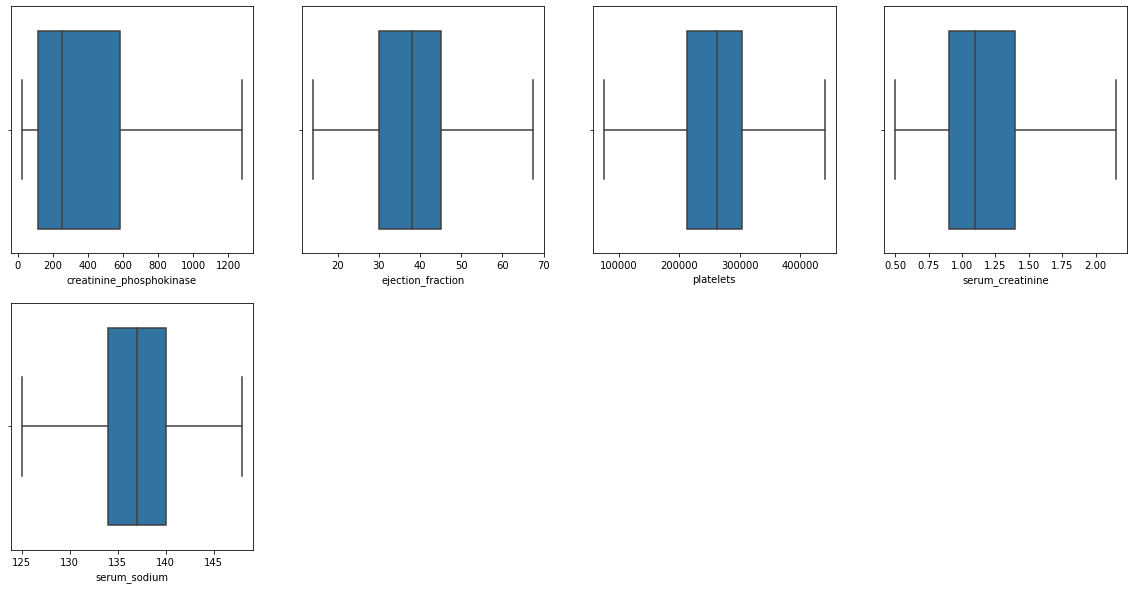

In [30]:
fig = plt.figure(figsize=(20,10))
j=1
for i in outliers:
    plt.subplot(2,4,j)
    sns.boxplot(df1[i])
    j=j+1

All the Outliers are handled !!!

In [31]:
# importing libraries
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer, StandardScaler

In [32]:
X = df1['creatinine_phosphokinase']

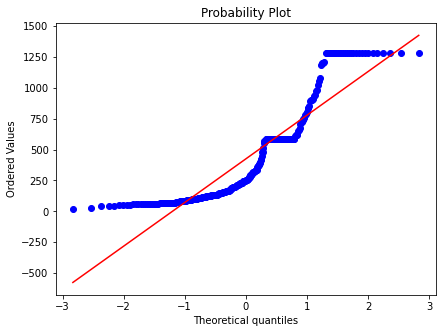

In [33]:
# Plottting QQ plots for creatinine_phosphokinase 
fig = plt.figure(figsize=(15,5))

plt.subplot(121)
stats.probplot(df1['creatinine_phosphokinase'], dist ="norm", plot = plt)
plt.show()

In [34]:
trf = FunctionTransformer(func=np.log1p)
X_train_transformed = trf.fit_transform(X)

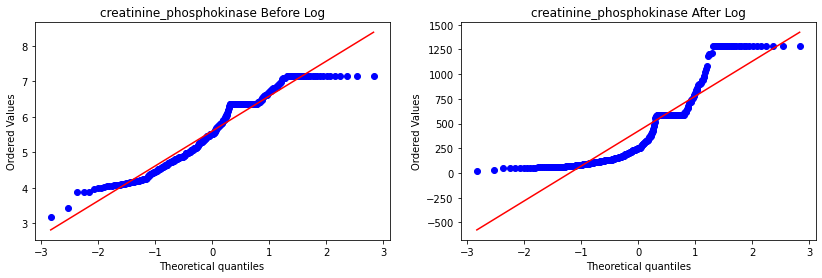

In [35]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train_transformed, dist="norm", plot=plt)
plt.title('creatinine_phosphokinase Before Log')

plt.subplot(122)
stats.probplot(X, dist="norm", plot=plt)
plt.title('creatinine_phosphokinase After Log')

plt.show()

There is an improvement in QQplot for creatinine_phosphokinase column

In [36]:
# replacing the transformed value into our original dataframe
df1['creatinine_phosphokinase']  = X_train_transformed

In [37]:
# Extarcting X and y 
X = df1.drop(columns = 'DEATH_EVENT')
y = df['DEATH_EVENT']


In [38]:
x_train,x_test,y_train,y_test = train_test_split(X,y ,test_size =0.2 ,random_state = 12)

In [39]:
# Feature Scaling

scaler = StandardScaler()
x_train_scaled  = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [40]:
x_train_scaled.shape

(239, 12)

In [41]:
x_test_scaled.shape

(60, 12)

# MODEL SELECTION

In [42]:
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,recall_score,precision_score

![Confusion Matrix](https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg)

(You can take a look at this https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62 to get more insights on Confusion Matrix)
In this notebook we will take a look at the basics..  
Above image is a Confusion Matrix. Well, it is a performance measurement for machine learning classification problem where output can be two or more classes. It is a table with 4 different combinations of predicted and actual values. 

**True Positive:**

    Interpretation: You predicted positive and it’s true.

    You predicted that a woman is pregnant and she actually is.

**True Negative:**

    Interpretation: You predicted negative and it’s true.

    You predicted that a man is not pregnant and he actually is not.

**False Positive:** (Type 1 Error)

    Interpretation: You predicted positive and it’s false.

    You predicted that a man is pregnant but he actually is not.

**False Negative:** (Type 2 Error)

    Interpretation: You predicted negative and it’s false.

    You predicted that a woman is not pregnant but she actually is.

Just Remember, We describe predicted values as Positive and Negative and actual values as True and False.

In [43]:
lr = LogisticRegression()
lr.fit(x_train_scaled,y_train)
y_pred = lr.predict(x_test_scaled)

accuracy_score(y_test,y_pred)

0.8333333333333334

In [44]:
lr2 = DecisionTreeClassifier()
lr.fit(x_train_scaled,y_train)
y_pred = lr.predict(x_test_scaled)

accuracy_score(y_test,y_pred)

0.8333333333333334

Logistic Regression and Decision Tree are giving around same type of accuracy. Let's take a look at other metrics 

In [45]:
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.8333333333333334
0.7142857142857143
0.7894736842105263
0.7894736842105263


In [46]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score

# Load the dataset
#df = pd.read_csv('/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')

# Feature Engineering
outliers = ['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
for feature in outliers:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    mini = q1 - 1.5 * iqr
    maxi = q3 + 1.5 * iqr
    df[feature] = np.where(
        df[feature] > maxi,
        maxi,
        np.where(
            df[feature] < mini,
            mini,
            df[feature]
        )
    )

# Feature Transformation
log_transform_features = ['creatinine_phosphokinase']
for feature in log_transform_features:
    df[feature] = np.log1p(df[feature])

# Splitting the data
X = df.drop(columns='DEATH_EVENT')
y = df['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Selection and Hyperparameter Tuning
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'n_estimators': [50, 100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=12)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test_scaled)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Random Forest Classifier - Hyperparameter Tuning Results:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")

# Print the best hyperparameters
print("Best Hyperparameters:")
print(grid_search.best_params_)


Random Forest Classifier - Hyperparameter Tuning Results:
Accuracy: 0.87
Recall: 0.76
Precision: 0.84
Best Hyperparameters:
{'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


Accuracy Score Metric gives around 83% accuracy

# THANK YOU! 🙂

IF YOU HAVE COME FAR TILL THIS CELL, DO GIVE A UPVOTE IF YOU LIKE MY WORK OR LEAVE A FEEDBACK